Elapsed_time:  3.2028393745422363


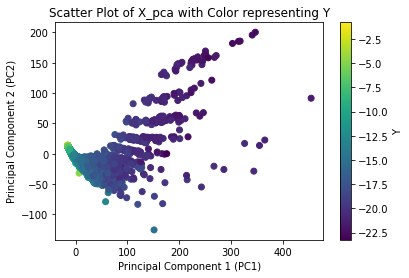

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import time

# Reading the data as DF, defining the X's and Y
df_robo = pd.DataFrame(pd.read_csv("/home/pers/allouche/PHY2446M/Data/roboBohr.csv"))
Y = df_robo.loc[:, 'Eat']
X = df_robo.drop(['Unnamed: 0','pubchem_id','Eat'], axis=1)

# Normalization of X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# x_data_normalized is now a numpy array, we can convert it back to a DataFrame 
X = pd.DataFrame(X_normalized, columns=X.columns)

# Create a PCA (Principale Component Analysis) object
pca = PCA(n_components=2,random_state=100)

# Create a pipeline with StandardScaler and PCA
pipeline = Pipeline([('scaler',scaler),('pca',pca)])

# Record the strat time
start_time = time.time()

# Fit the pipeline to the data
X_pca = pipeline.fit_transform(X)

# Mark the end time
end_time=time.time()

# Compute the duration
elapsed_time = end_time - start_time
print('Elapsed_time: ', elapsed_time)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plotting the X_pca with Y as color
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=Y, cmap='viridis')
plt.title('Scatter Plot of X_pca with Color representing Y')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Y')
plt.show()

 t-SNE (t-distributed Stochastic Neighbor Embedding) is another dimensionality reduction technique that is commonly used for visualization

In [2]:
%%capture --no-stdout
from sklearn.manifold import TSNE

# Create at-SNE object
tsne = TSNE(n_components=2,random_state=100)

# Create a pipeline with StandardScaler and PCA
pipeline = Pipeline([('scaler',scaler),('tsne',tsne)])

# Record the strat time
start_time = time.time()

# Fit the pipeline to the data
X_tsne = pipeline.fit_transform(X)

# Mark the end time
end_time=time.time()

# Compute the duration
elapsed_time = end_time - start_time
print(f'Elapsed_time: {elapsed_time} seconds')

df_tsne = pd.DataFrame(data=X_tsne, columns=['PC1', 'PC2'])



Elapsed_time: 294.59699416160583 seconds


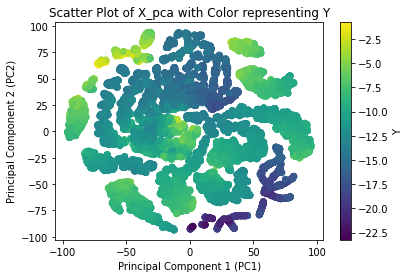

In [3]:
# Plotting the X_pca with Y as color
plt.scatter(df_tsne['PC1'], df_tsne['PC2'], c=Y, cmap='viridis')
plt.title('Scatter Plot of X_pca with Color representing Y')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Y')
plt.show()

In [4]:
duration = 0.0
for i in range(2, 16):
    # Create a PCA (Principal Component Analysis) object
    pca = PCA(n_components=i, random_state=100)

    # Create a pipeline with StandardScaler and PCA
    pipeline = Pipeline([('scaler', scaler), ('pca', pca)])

    # Record the start time
    start_time = time.time()

    # Fit the pipeline to the data
    X_pca = pipeline.fit_transform(X)

    # Record the end time
    end_time = time.time()

    # Compute the duration
    elapsed_time = end_time - start_time
    duration = duration + elapsed_time
    print(f'Elapsed_time for n_component={i}: {elapsed_time} seconds')
    print('Explained Variance= ',pca.explained_variance_ratio_.sum())
    print('Duration within the computation= ',duration)
    print('\n')

Elapsed_time for n_component=2: 2.570169448852539 seconds
Explained Variance=  0.7964284134699178
Duration within the computation=  2.570169448852539


Elapsed_time for n_component=3: 3.118635892868042 seconds
Explained Variance=  0.8604908724013985
Duration within the computation=  5.688805341720581


Elapsed_time for n_component=4: 2.817462205886841 seconds
Explained Variance=  0.8925762697393518
Duration within the computation=  8.506267547607422


Elapsed_time for n_component=5: 2.769299030303955 seconds
Explained Variance=  0.9108423773055577
Duration within the computation=  11.275566577911377


Elapsed_time for n_component=6: 3.997561454772949 seconds
Explained Variance=  0.9256910715369503
Duration within the computation=  15.273128032684326


Elapsed_time for n_component=7: 4.030794620513916 seconds
Explained Variance=  0.9369469486926457
Duration within the computation=  19.303922653198242


Elapsed_time for n_component=8: 3.8976099491119385 seconds
Explained Variance=  0.945

The minimum value of n_component to obtain a variance>0.95 is 9. It took 3.2989003658294678 seconds.
Explained Variance=  0.9517550690804247
Duration within the computation=  19.49043321609497 seconds